In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.shape

(768, 9)

In [8]:
df.Outcome.value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

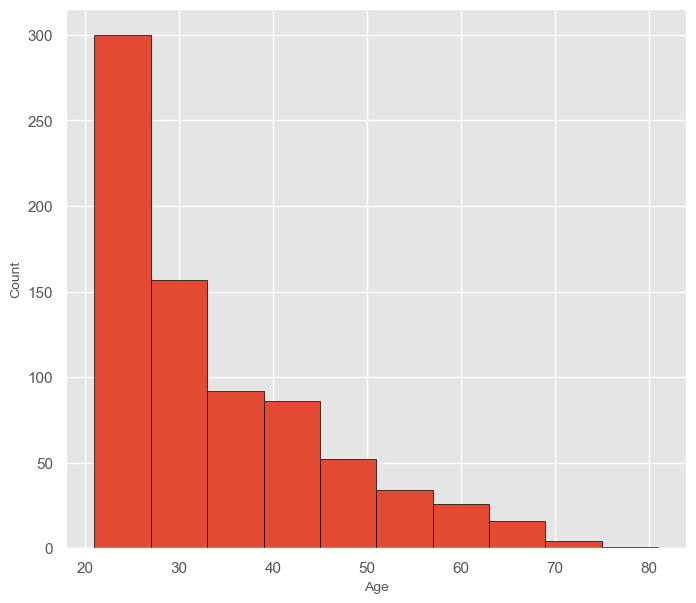

In [9]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

<Axes: xlabel='Age', ylabel='Density'>

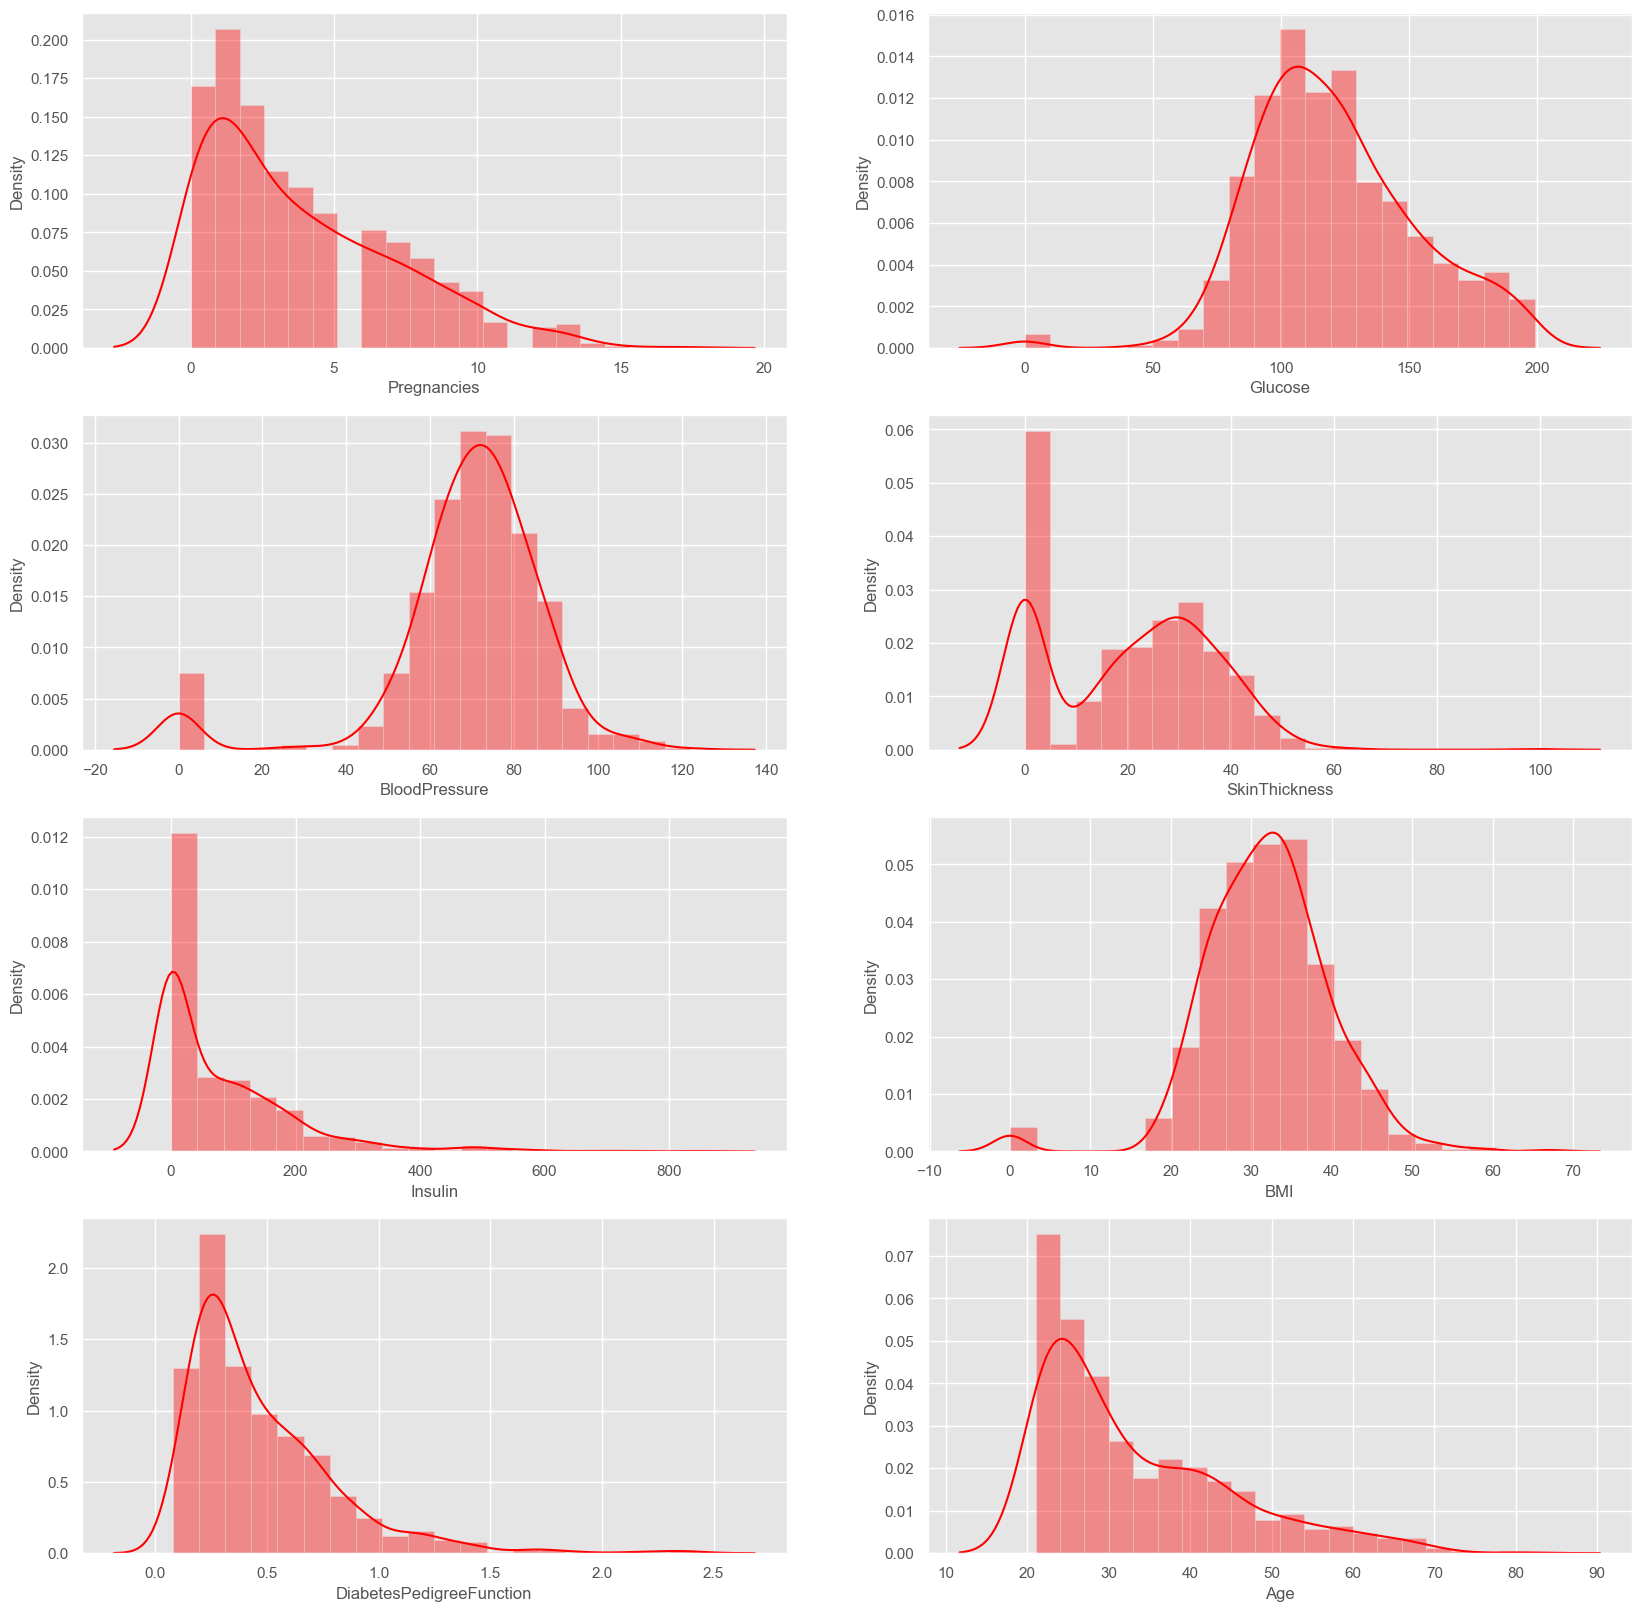

In [10]:
fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")

In [11]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [12]:
df.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


In [13]:
df.groupby("Outcome").agg({"Glucose":"mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [14]:
df.groupby("Outcome").agg({"Glucose":"max"})

,Glucose
Outcome,
0,197
1,199


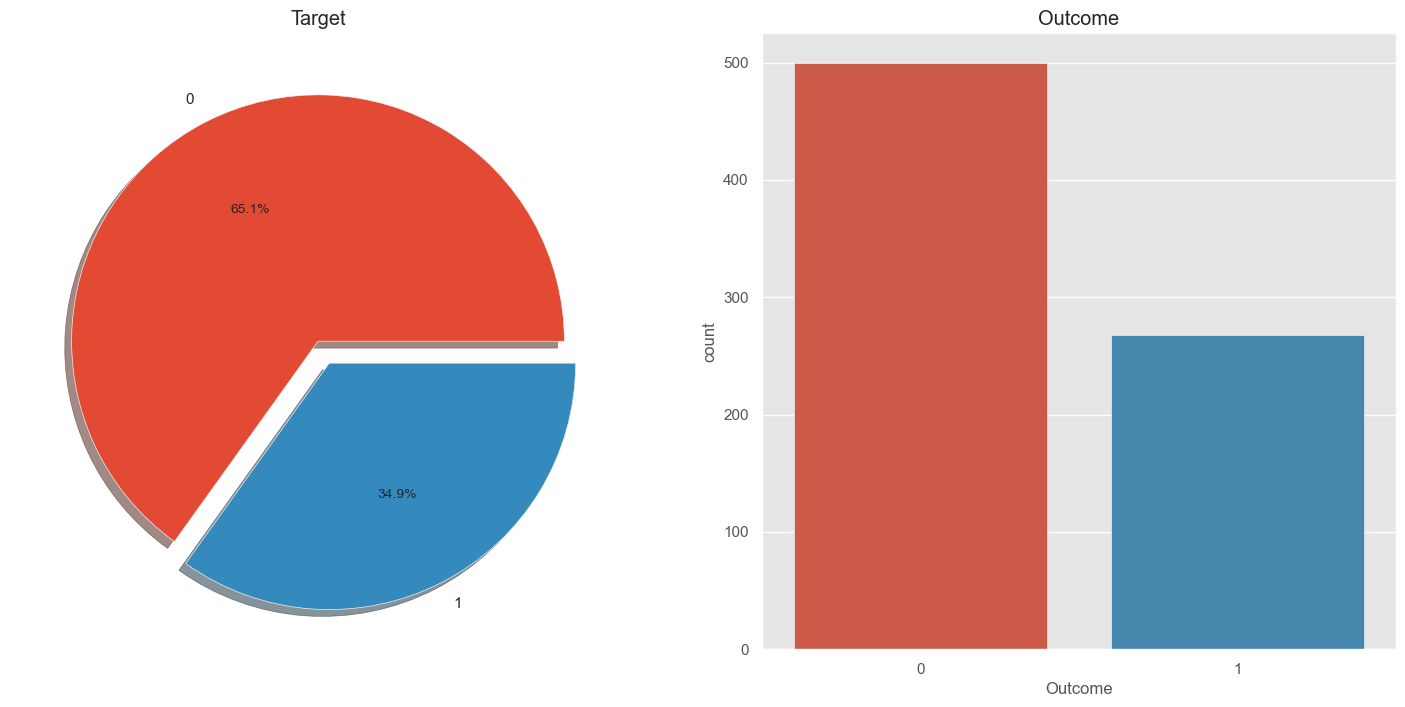

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1],autopct="%1.1f%%",ax=ax[0],shadow=True)
ax[0].set_title('Target')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [16]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


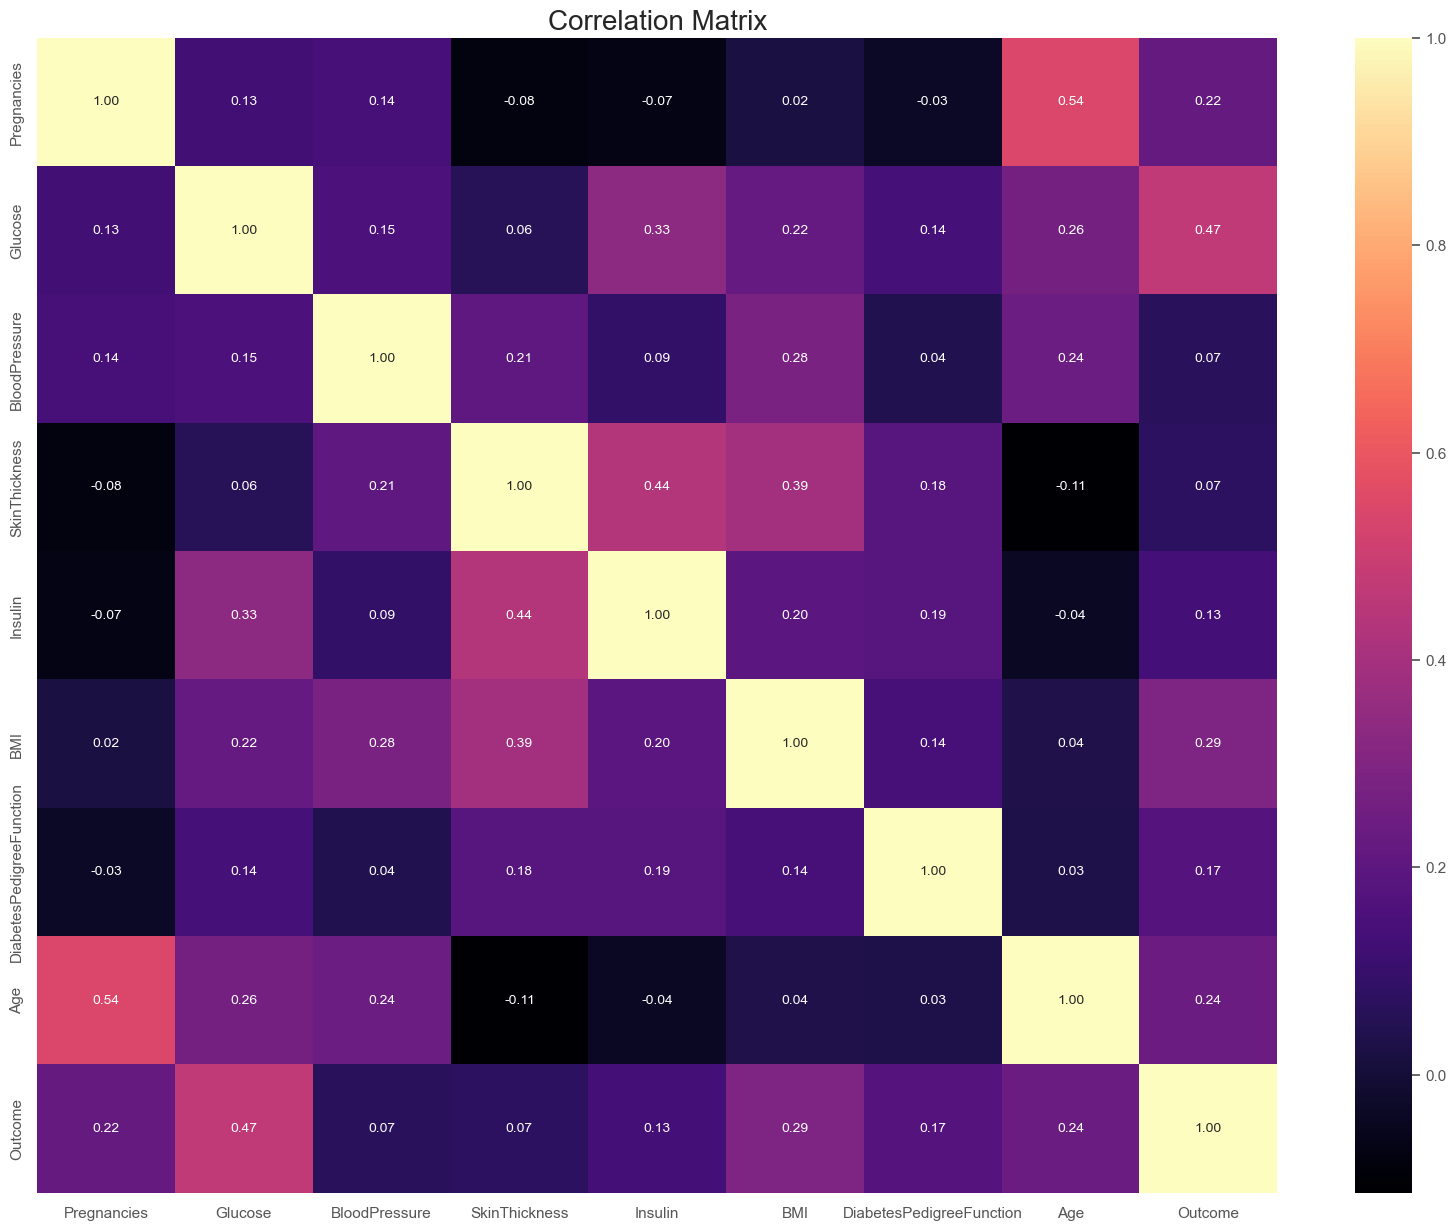

In [17]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols:
    zero_values = (df[col] <= 0).sum()
    if zero_values > 0:
        median = df[col].median()
        df.loc[df[col] <= 0, col] = median

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [21]:
df1 = df.copy()
df = df1.sample(frac=1,random_state=42).reset_index(drop=True)

# def outilers(df):
#     q1 =df.quantile(0.25)
#     q3 = df.quantile(0.75)
#     IQR = q3-q1
#     lower_bound = q1 - (1.5 * IQR)
#     upper_bound = q3 + (1.5 * IQR)
#     filtered_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
#     return filtered_df
    

In [22]:
# df=outilers(df1)

In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190.0,34.0,0.430,43,0
1,2,112,75,32,30.5,35.7,0.148,21,0
2,2,108,64,23,30.5,30.8,0.158,21,0
3,8,107,80,23,30.5,24.6,0.856,34,0
4,7,136,90,23,30.5,29.9,0.210,50,0


In [24]:
df.shape

(768, 9)

In [25]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(576, 8)
(576,)
(192, 8)
(192,)


In [28]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [30]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=100, solver='saga'),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

In [31]:
params = {
    'Logistic Regression': {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'Decision Tree': {'max_depth': [None, 5,10, 20,30], 'min_samples_split': [2, 10, 15,20]},
}

In [32]:
best_estimators = {}
accuracy_results = {}

# Train and tune each model
for model_name in models:
    clf = GridSearchCV(models[model_name], params[model_name], cv=5)
    clf.fit(X_train_scaled, y_train)
    train_predict = clf.predict(X_train_scaled)
    test_predict = clf.predict(X_test_scaled)
    
    train_accuracy = accuracy_score(y_train, train_predict)
    test_accuracy = accuracy_score(y_test, test_predict)
    
    print(f"Train Accuracy: {model_name} : {train_accuracy}")
    print(f"Test Accuracy: {model_name} : {test_accuracy}")
    
    best_estimators[model_name] = clf.best_estimator_
    accuracy_results[model_name] = {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}


Train Accuracy: Logistic Regression : 0.7864583333333334
Test Accuracy: Logistic Regression : 0.75
Train Accuracy: KNN : 1.0
Test Accuracy: KNN : 0.7135416666666666
Train Accuracy: Decision Tree : 0.8871527777777778
Test Accuracy: Decision Tree : 0.6875


In [33]:
best_model_name = max(accuracy_results, key=lambda x: accuracy_results[x]['test_accuracy'])
best_model = best_estimators[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Train Accuracy: {accuracy_results[best_model_name]['train_accuracy']}")
print(f"Test Accuracy: {accuracy_results[best_model_name]['test_accuracy']}")

# Save the best model to a pickle file
with open(f'best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

Best Model: Logistic Regression
Train Accuracy: 0.7864583333333334
Test Accuracy: 0.75


In [53]:
df=pd.DataFrame({'DPD':['0,0,0,0,0,0,0,0','','30,60,91,0,0','75,54,78,94,34,34,56,23,43,45,56,67,67,67,67,67,67,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45']})
df

,DPD
0,"0,0,0,0,0,0,0,0"
1,
2,"30,60,91,0,0"
3,"75,54,78,94,34,34,56,23,43,45,56,67,67,67,67,6..."


In [54]:
df1=df['DPD'].str.split(",",expand=True).iloc[:, :7]

In [55]:
df1

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,0
1,,None,None,None,None,None,None
2,30,60,91,0,0,None,None
3,75,54,78,94,34,34,56


In [ ]:
hh=pd.DataFrame({'DPD':[]})

In [65]:
import pandas as pd

df = pd.DataFrame({'Integers': ['12345', '678', '9101112', '1314151617', '18', '192021']})
print(df)
split_df = df['Integers'].str.split('', expand=True).iloc[:, 1:-1]  
split_df['Length'] = split_df.apply(lambda row: row.count(),axis=1)
print(split_df)


     Integers
0       12345
1         678
2     9101112
3  1314151617
4          18
5      192021
   1  2  3     4     5     6     7     8     9    10  Length
0  1  2  3     4     5        None  None  None  None       6
1  6  7  8        None  None  None  None  None  None       4
2  9  1  0     1     1     1     2        None  None       8
3  1  3  1     4     1     5     1     6     1     7      10
4  1  8     None  None  None  None  None  None  None       3
5  1  9  2     0     2     1        None  None  None       7
